In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16,ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

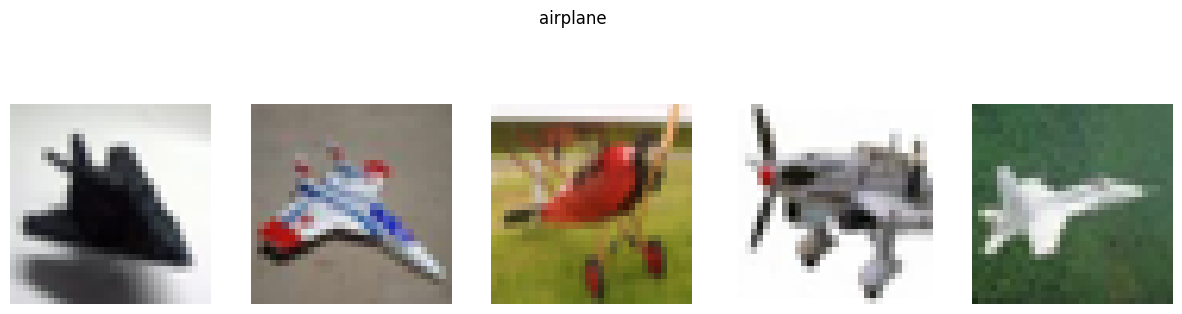

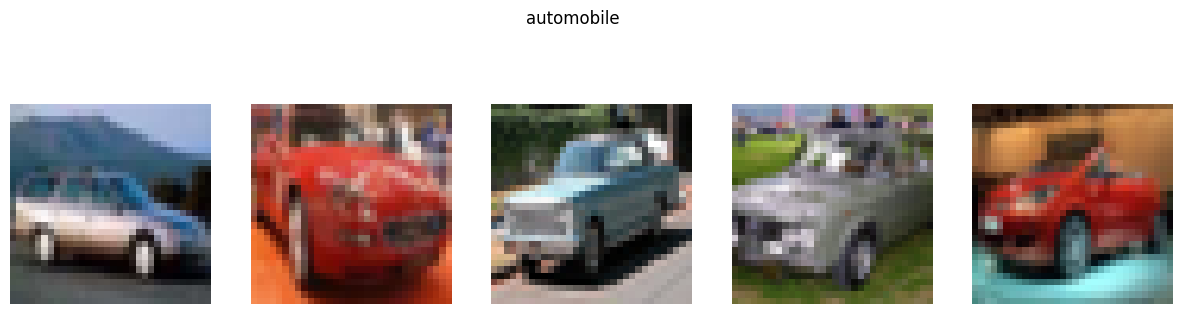

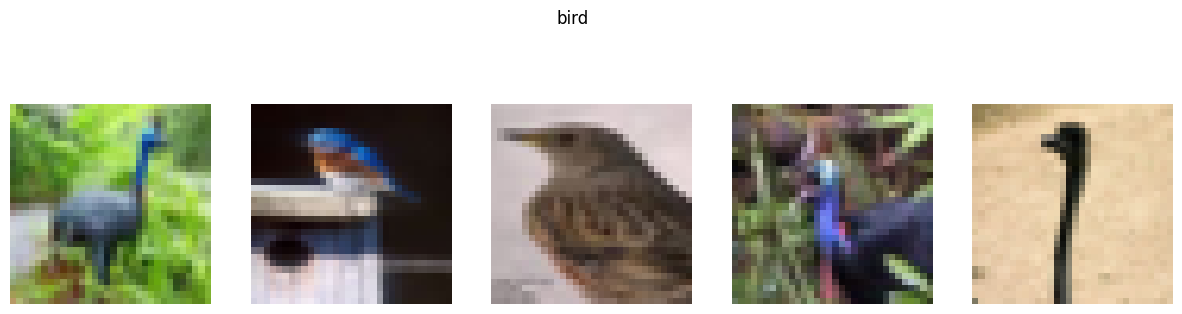

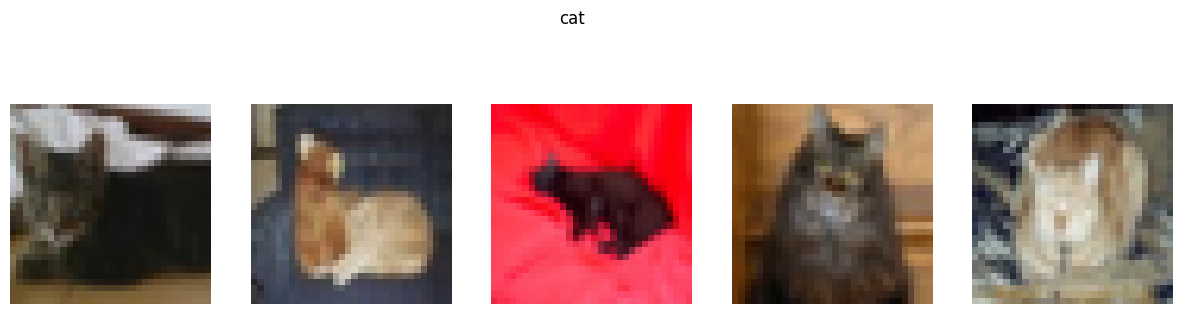

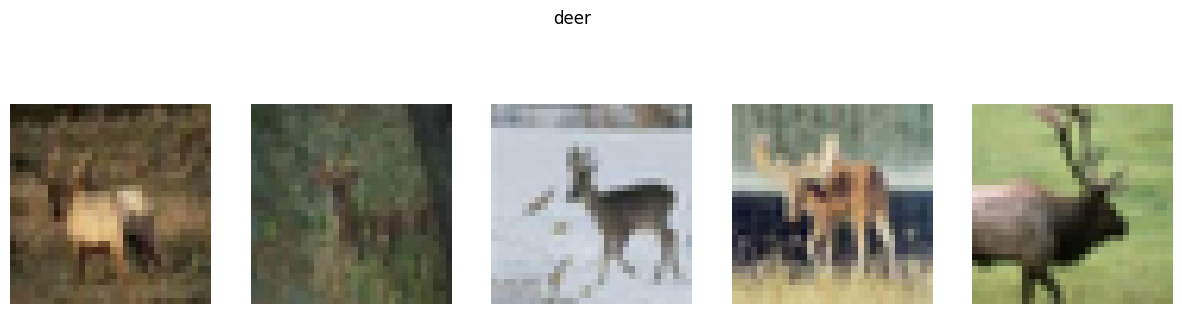

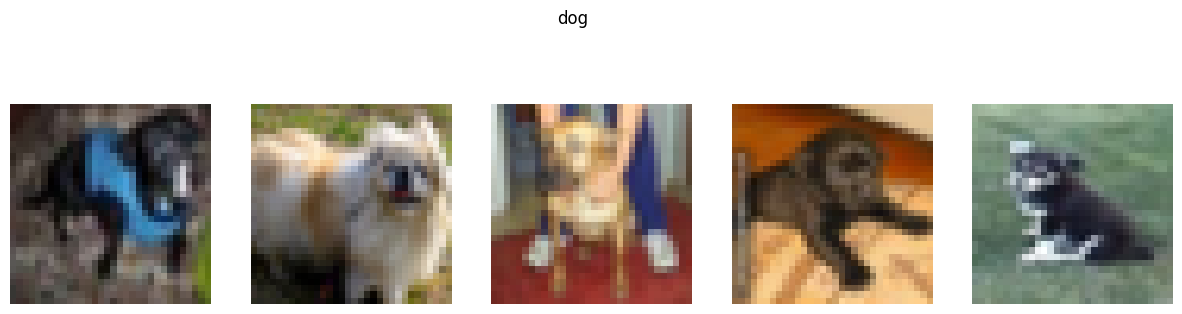

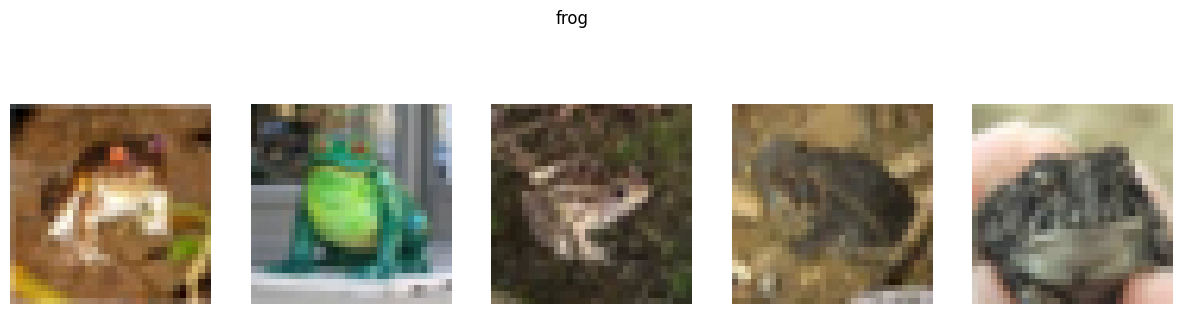

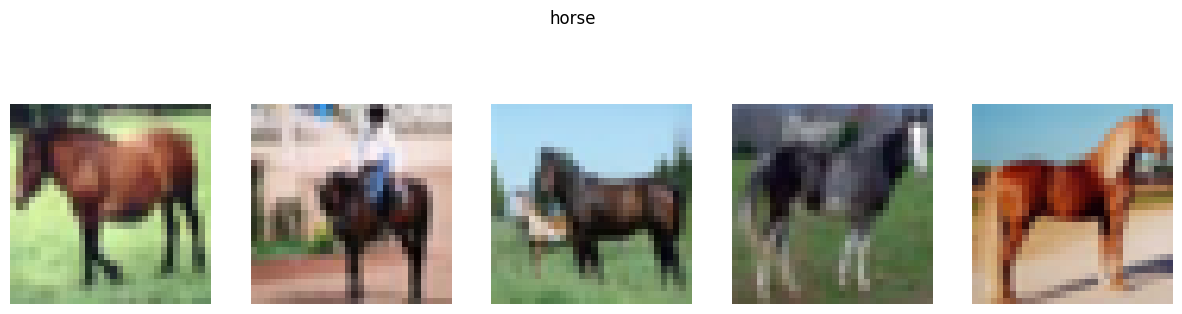

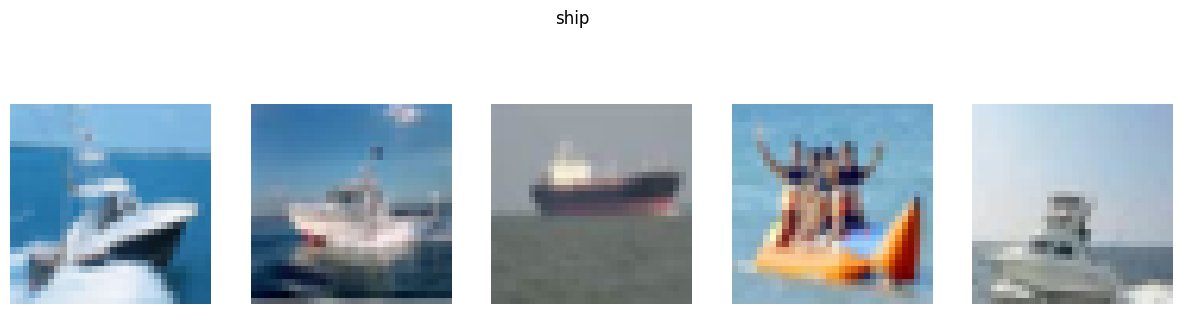

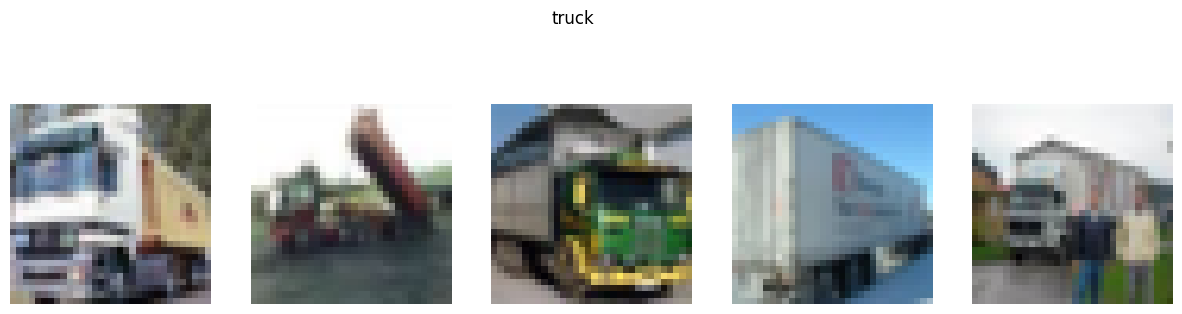

In [2]:
base_dir = r"C:\Users\aashutosh kumar\Videos\train"
classes = os.listdir(base_dir)
for j in classes:
    path = os.path.join(base_dir, j)
    images = os.listdir(path)
    plt.figure(figsize=(15,4))
    for index, img in enumerate(images[:5]):
        img_path = os.path.join(path, img)
        image = plt.imread(img_path)
        plt.suptitle(j)
        plt.subplot(1, 5, index + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()


In [3]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,  
                                   zoom_range=0.2,
                                   horizontal_flip=True,) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = r"C:\Users\aashutosh kumar\Videos\train",
                                                                 labels = "inferred",
                                                                 batch_size = 64,
                                                                 image_size = (32,32))


val_data = tf.keras.preprocessing.image_dataset_from_directory(directory = r"C:\Users\aashutosh kumar\Videos\test",
                                                                 labels = "inferred",
                                                                 batch_size = 64,
                                                                 image_size = (32,32))

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [5]:
vgg = VGG16(include_top = False,weights = "imagenet",input_shape = (32,32,3))
vgg.trainable = False

In [6]:
for images, labels in train_data.take(1):
    print(images.shape) 
    
for images, labels in val_data.take(1):
    print(images.shape)
    

(64, 32, 32, 3)
(64, 32, 32, 3)


In [7]:
def normalize_(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label

train_data=train_data.map(normalize_)
val_data=val_data.map(normalize_)

In [8]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  input_shape=(32, 32, 3))) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
  
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
model.add(Flatten())

model.add(Dense(units = 64,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 64,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 10,activation = "softmax"))

model.compile(metrics=["accuracy"],loss="sparse_categorical_crossentropy",optimizer="Adam")

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                    

In [10]:
m=model.fit(train_data,epochs=70,validation_data=val_data)

Epoch 1/70
782/782 [==============================] - 17s 15ms/step - loss: 2.0813 - accuracy: 0.1638 - val_loss: 1.9092 - val_accuracy: 0.2049
Epoch 2/70
782/782 [==============================] - 12s 15ms/step - loss: 1.8886 - accuracy: 0.2156 - val_loss: 1.7450 - val_accuracy: 0.2871
Epoch 3/70
782/782 [==============================] - 14s 17ms/step - loss: 1.7551 - accuracy: 0.2765 - val_loss: 1.6858 - val_accuracy: 0.2847
Epoch 4/70
782/782 [==============================] - 16s 20ms/step - loss: 1.6699 - accuracy: 0.3150 - val_loss: 1.5675 - val_accuracy: 0.3620
Epoch 5/70
782/782 [==============================] - 16s 20ms/step - loss: 1.6114 - accuracy: 0.3414 - val_loss: 1.6176 - val_accuracy: 0.3553
Epoch 6/70
782/782 [==============================] - 14s 18ms/step - loss: 1.5628 - accuracy: 0.3642 - val_loss: 1.4844 - val_accuracy: 0.4122
Epoch 7/70
782/782 [==============================] - 15s 19ms/step - loss: 1.5272 - accuracy: 0.3880 - val_loss: 1.4333 - val_accuracy:

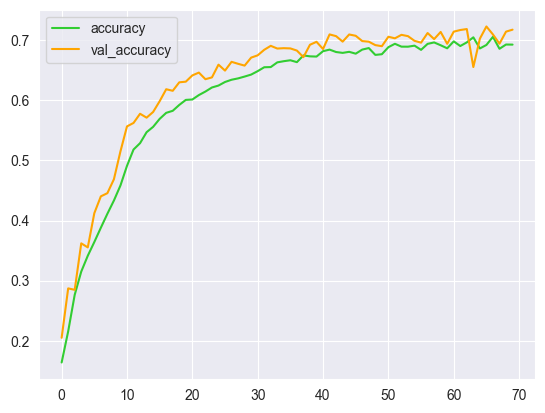

In [12]:
sns.set_style("darkgrid")
plt.plot(m.history["accuracy"],color = "limegreen")
plt.plot(m.history["val_accuracy"],color = "orange")
plt.legend(["accuracy","val_accuracy"])

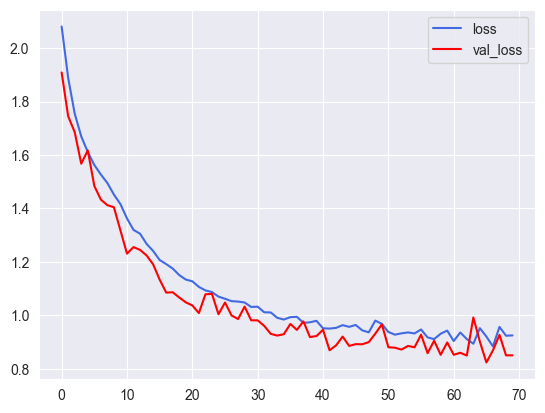

In [13]:
sns.set_style("darkgrid")
plt.plot(m.history["loss"],color = "royalblue")
plt.plot(m.history["val_loss"],color = "red")
plt.legend(["loss","val_loss"])

In [14]:
model.save("CIFAR.h5")